In [1]:
from mdp import *
import numpy as np
import matplotlib.pyplot as plt

### Approximate Q learning: Linear Q-function

In [2]:
# defining a linear Q function class
class LinearQ(QFunction):

    def __init__(self, mdp, features):
        self.mdp = mdp
        self.features = features
        # initialize weights to zero
        num_weights = self.features.get_num_actions() * self.features.get_num_features() 
        self.weights = np.zeros(shape=(num_weights)) 

        # initialize value table
        self.V = {}
        for state in (self.mdp.states):
            self.V[state] = 0.0

    # update the weights
    def update(self, state, action, _, delta):
        # extract features from state
        feature_values = np.array(self.features.extract(state, action))

        #print(f"state: {state}, action: {action}")
        #print(f"features values: {feature_values}")
        #print(f"delta: {delta}")

        # update weights
        self.weights = self.weights + delta * feature_values


    # evaluate q function
    def evaluate(self, state, action):
        # extract features from state
        feature_values = np.array(self.features.extract(state, action))
        #print("feature values: ",feature_values)
        #print("weights: ",self.weights)
        # compute Q value
        Q = np.dot(feature_values, self.weights)
        return Q


    def evaluate_V(self, state):
        return self.V[state]

    def update_V_from_Q(self):
        for state in self.mdp.states:
            actions = self.mdp.get_actions(state)
            self.V[state] =  max([self.evaluate(state, action) for action in actions])



# defining a feature extractor class for gridworld problem (hand-engineered features)
class GridWorldFeatures:
    def __init__(self, mdp):
        self.mdp = mdp
        self.num_features = 5
        

    def get_num_features(self):
        return self.num_features    
 
 
    def get_num_actions(self):
        return len(self.mdp.get_actions())


    '''
        We will define five features:
        1) normalized x-distance from goal
        2) normalized y-distance from goal
        3) normalized manhattan distance from goal
        4) if we are in same row as goal (boolean- 1 or 0)
        5) if we are in same column as goal (boolean- 1 or 0)
    '''
    def extract(self, state, action):
        (xg, yg) = self.mdp.goal
        (x, y) = state

        feature_values = []
        for a in self.mdp.get_actions():
            if (a == action) and (state != self.mdp.exit):
                feature_values.append(abs(x-xg)/self.mdp.width)
                feature_values.append(abs(y-yg)/self.mdp.height)
                feature_values.append((abs(xg-x)/self.mdp.width) + (abs(yg-y)/self.mdp.height))
                feature_values.append(1 if y==yg else 0) 
                feature_values.append(1 if x==xg else 0) 
            else:
                feature_values += [0.0 for _ in range(self.num_features)]
        
        return feature_values        



Episode# 0, length: 69, accumulated reward: 0.0007735540101454297
-----------------------
 0.00  0.00  0.00  0.20 
 0.00  0.00  0.00  0.10 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 1, length: 49, accumulated reward: 0.00636268544113595
-----------------------
 0.02  0.02  0.02  0.36 
 0.01  0.00  0.00  0.18 
 0.01  0.01  0.01  0.00 
-----------------------
Episode# 2, length: 25, accumulated reward: 0.07976644307687256
-----------------------
 0.06  0.06  0.05  0.49 
 0.02  0.00  0.01  0.24 
 0.03  0.02  0.02  0.01 
-----------------------
Episode# 3, length: 65, accumulated reward: 0.0011790184577738603
-----------------------
 0.08  0.08  0.07  0.59 
 0.02  0.00  0.01  0.30 
 0.03  0.02  0.02  0.01 
-----------------------
Episode# 4, length: 99, accumulated reward: 3.279185047850314e-05
-----------------------
 0.09  0.08  0.08  0.67 
 0.02  0.00  0.01  0.34 
 0.02  0.02  0.01  0.01 
-----------------------
Episode# 5, length: 15, accumulated reward: 0.2287679245496

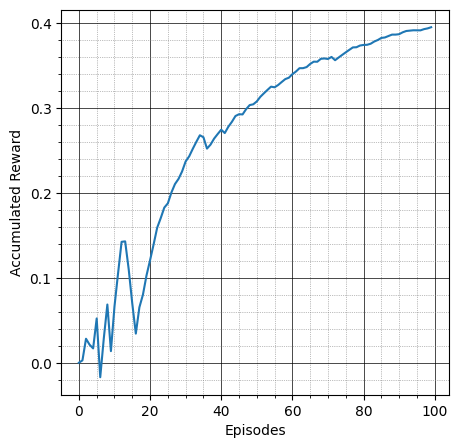

In [3]:
# instantiate grid world mdp
gw = GridWorld(discount_factor=0.9)

# instantiate feature extractor
features = GridWorldFeatures(gw)

# instantiate linear q function object
qfunction = LinearQ(gw, features)

# instantiate Q learner
QL = QLearner(gw, qfunction, epsilon=0.1, alpha=0.1)

# training
episode_rewards = QL.train(episodes=100)

# policy extraction
pi = qfunction.extract_policy(gw)

print("-----------------------")
for y in range(gw.height-1, -1, -1):
    for x in range(gw.width):
        if (x,y) in pi:
            print(f"{pi[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards, window_size=100)


Episode# 0, length: 32, accumulated reward: 0.038152042447694615
-----------------------
 0.00  0.00  0.00  0.60 
 0.00  0.00  0.00  0.30 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 1, length: 37, accumulated reward: 0.022528399544939195
-----------------------
 0.22  0.20  0.18  0.84 
 0.07  0.00  0.03  0.42 
 0.09  0.07  0.05  0.03 
-----------------------
Episode# 2, length: 18, accumulated reward: 0.16677181699666577
-----------------------
 0.36  0.33  0.30  0.94 
 0.12  0.00  0.06  0.47 
 0.14  0.11  0.08  0.05 
-----------------------
Episode# 3, length: 43, accumulated reward: 0.011972515182562033
-----------------------
 0.35  0.35  0.35  0.97 
 0.13  0.00  0.07  0.49 
 0.17  0.13  0.10  0.07 
-----------------------
Episode# 4, length: 6, accumulated reward: -0.5904900000000001
-----------------------
 0.42  0.39  0.37  0.53 
 0.12  0.00  0.08 -0.06 
 0.17  0.15  0.13  0.24 
-----------------------
Episode# 5, length: 42, accumulated reward: 0.01330279464729114

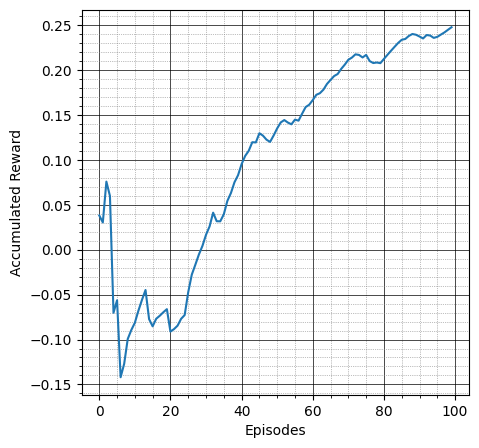

In [4]:
# instantiate grid world mdp
gw2 = GridWorld(discount_factor=0.9)

# instantiate feature extractor
features2 = GridWorldFeatures(gw2)

# instantiate linear q function object
qfunction2 = LinearQ(gw2, features2)

# instantiate Q learner
QL2 = QLearner(gw2, qfunction2, epsilon=0.1, alpha=0.3)

# training with SARSA instead
episode_rewards = QL2.train(episodes=100, SARSA=True)

# policy extraction
pi2 = qfunction2.extract_policy(gw2)

print("-----------------------")
for y in range(gw2.height-1, -1, -1):
    for x in range(gw2.width):
        if (x,y) in pi2:
            print(f"{pi2[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards, window_size=100)


Episode# 0, length: 4, accumulated reward: -4.1450000000000005
-----------------------
 0.00  0.00  0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00  0.00  0.00 
 0.00  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 1, length: 4, accumulated reward: -4.1450000000000005
-----------------------
-0.01 -0.01 -0.01 -0.01 -0.00 -0.00 
-0.01 -0.01 -0.01 -0.00 -0.00 -0.00 
-0.01 -0.01 -0.01 -0.00 -0.00 -0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 2, length: 130, accumulated reward: -0.5000062553803573
-----------------------
-0.38 -0.32 -0.27 -0.21 -0.16 -0.10 
-0.35 -0.29 -0.23 -0.18 -0.12 -0.07 
-0.31 -0.26 -0.20 -0.15 -0.09 -0.03 
-0.29  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 3, length: 12, accumulated reward: -2.0690529804500004
-----------------------
-0.40 -0.34 -0.28 -0.22 -0.16 -0.11 
-0.36 -0.30 -0.24 -0.19 -0.13 -0.07 
-0.32 -0.27 -0.21 -0.15 -0.09 -0.04 
-0.30  0.00  0.00  0.0

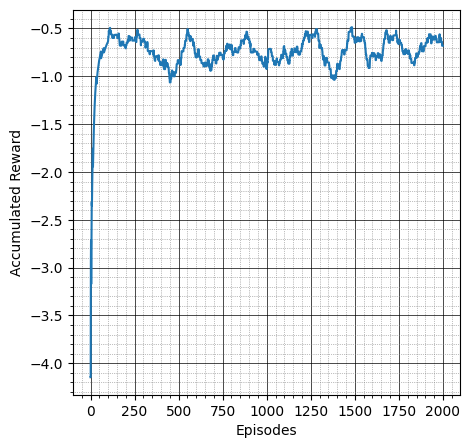

In [5]:
# intantiate cliffworld object
cw = CliffWorld(discount_factor=0.9, noise=0.0)

# instantiate feature extractor
features3 = GridWorldFeatures(cw)

# instantiate linear q function object
qfunction3 = LinearQ(cw, features3)

# instantiate Q learner
QL3 = QLearner(cw, qfunction3, epsilon=0.1, alpha=0.1)


# training
episode_rewards = QL3.train(episodes=2000)

# policy extraction
pi3 = qfunction3.extract_policy(cw)

print("-----------------------")
for y in range(cw.height-1, -1, -1):
    for x in range(cw.width):
        if (x,y) in pi3:
            print(f"{pi3[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards, window_size=100)

Episode# 0, length: 7, accumulated reward: -3.1572050000000003
-----------------------
-0.01 -0.01 -0.01 -0.01 -0.00 -0.00 
-0.01 -0.01 -0.01 -0.00 -0.00 -0.00 
-0.01 -0.01 -0.01 -0.00 -0.00 -0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 1, length: 52, accumulated reward: -0.5231919884329408
-----------------------
-0.20 -0.17 -0.15 -0.13 -0.10 -0.08 
-0.17 -0.15 -0.12 -0.10 -0.08 -0.05 
-0.14 -0.12 -0.10 -0.07 -0.05 -0.03 
-0.15  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 2, length: 111, accumulated reward: -0.49999485478492756
-----------------------
-0.68 -0.59 -0.49 -0.39 -0.30 -0.24 
-0.60 -0.51 -0.42 -0.33 -0.23 -0.15 
-0.50 -0.42 -0.34 -0.26 -0.16 -0.06 
-0.44  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 3, length: 53, accumulated reward: -0.5208727895896468
-----------------------
-0.68 -0.60 -0.52 -0.44 -0.36 -0.28 
-0.59 -0.51 -0.43 -0.35 -0.26 -0.18 
-0.50 -0.42 -0.34 -0.25 -0.17 -0.08 
-0.50  0.00  0.00  0

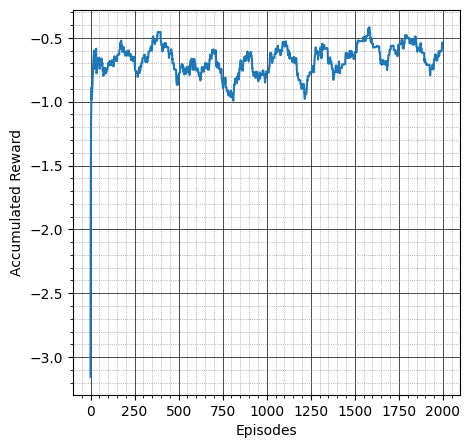

In [6]:
# intantiate cliffworld object
cw = CliffWorld(discount_factor=0.9, noise=0.0)

# instantiate feature extractor
features3 = GridWorldFeatures(cw)

# instantiate linear q function object
qfunction3 = LinearQ(cw, features3)

# instantiate Q learner
QL3 = QLearner(cw, qfunction3, epsilon=0.1, alpha=0.1)


# training
episode_rewards = QL3.train(episodes=2000, SARSA=True)

# policy extraction
pi3 = qfunction3.extract_policy(cw)

print("-----------------------")
for y in range(cw.height-1, -1, -1):
    for x in range(cw.width):
        if (x,y) in pi3:
            print(f"{pi3[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards, window_size=100)

#### The hand engineered features seem to give reasonably good policies. Now let's try using a deep neural network instead of hand engineered features

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam


In [3]:
# interface for a deep Q network agent
class DeepAgent(ABC):
    @staticmethod
    def encode_state(state):
        # convert the state into a pytorch tensor
        return torch.as_tensor(state, dtype=torch.float32)
    

# deep Q function (i.e. a deep neural network representation of the Q function) class which inherits from DeepAgent and QFunction
class DeepQFunction(QFunction, DeepAgent):
    def __init__(self, mdp, state_space, action_space, hidden_dim=64, alpha=0.001):
        self.mdp = mdp
        self.state_space = state_space
        self.action_space = action_space
        self.alpha = alpha

        # sequential neural network Q function
        self.q_network = nn.Sequential(
            nn.Linear(in_features=self.state_space, out_features=hidden_dim),
            nn.ReLU(),
            nn.Linear(in_features=hidden_dim, out_features=hidden_dim),
            nn.ReLU(),
            nn.Linear(in_features=hidden_dim, out_features=self.action_space)
        )
        self.optimizer = Adam(self.q_network.parameters(), lr=self.alpha)

        # mapping actions to integer IDs
        actions = self.mdp.get_actions()
        self.action_to_id = {actions[i]:i for i in range(len(actions))} 
        self.id_to_action = {i:actions[i] for i in range(len(actions))} 


        # initialize value table
        self.V = {}
        for state in (self.mdp.states):
            self.V[state] = 0.0
    

    def update(self, state, action, _, delta):
        # train the network based on the squared error
        
        # reset param gradients
        self.optimizer.zero_grad()
        # backpropagate loss
        loss = delta**2
        loss.backward()
        # gradient descent step
        self.optimizer.step()


    def evaluate(self, state, action, training=True):
        # convert state to pytorch tensor
        state = self.encode_state(state)
        if training:
            q_values = self.q_network(state)
        else:
             # avoid tracking gradients for non-training forward pass
            with torch.no_grad():
                q_values = self.q_network(state)

        q_value = q_values[self.action_to_id[action]]
        return q_value
    

    def get_max_q(self, state, actions):
        # convert state to pytorch tensor
        state = self.encode_state(state)
        
        # avoid tracking gradients for this forward pass
        with torch.no_grad():
            q_values = torch.as_tensor(self.encode_state(state), dtype=torch.float32)
        
        argmax_q = None
        max_q = float("-inf")
        for action in actions:
            value = q_values[self.action_to_id[action]].item()
            if max_q < value:
                max_q = value
                argmax_q = action

        return (argmax_q, max_q)    
    

    def evaluate_V(self, state):
        return self.V[state]

    def update_V_from_Q(self):
        for state in self.mdp.states:
            actions = self.mdp.get_actions(state)
            self.V[state] =  max([self.evaluate(state, action, training=False) for action in actions])




#### Now let's test out the deep Q function

Episode# 0, length: 93, accumulated reward: -6.170365191715192e-05
-----------------------
-0.07 -0.03 -0.04  0.01 
 0.03  0.00  0.00 -0.00 
 0.02  0.07  0.05  0.00 
-----------------------
Episode# 1, length: 21, accumulated reward: -0.12157665459056935
-----------------------
-0.07 -0.06 -0.02 -0.19 
 0.04  0.00 -0.01 -0.16 
 0.05  0.07  0.03 -0.02 
-----------------------
Episode# 2, length: 47, accumulated reward: -0.00785516721127895
-----------------------
-0.08 -0.05 -0.02 -0.31 
-0.07  0.00 -0.01 -0.26 
-0.04 -0.03 -0.02 -0.02 
-----------------------
Episode# 3, length: 142, accumulated reward: -3.533408349463646e-07
-----------------------
-0.05 -0.05 -0.03 -0.32 
-0.07  0.00 -0.06 -0.27 
-0.06 -0.07 -0.06 -0.06 
-----------------------
Episode# 4, length: 627, accumulated reward: 2.2688767722100402e-29
-----------------------
-0.08 -0.07 -0.07 -0.21 
-0.02  0.00 -0.06 -0.19 
-0.02 -0.04 -0.05 -0.08 
-----------------------
Episode# 5, length: 18, accumulated reward: -0.16677

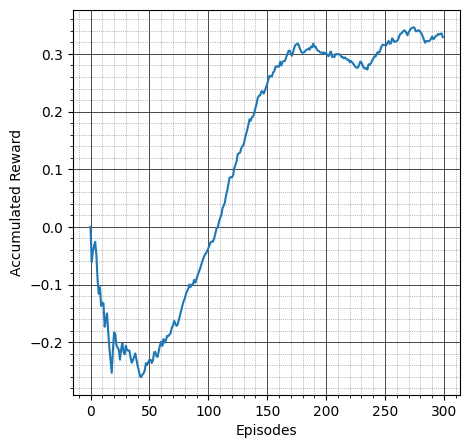

In [4]:
# instantiate grid world mdp
gw = GridWorld(discount_factor=0.9)

# instantiate Deep q function object for the gridworld problem
qfunction = DeepQFunction(gw, state_space=len(gw.initial_state), action_space=5, hidden_dim=32)

# instantiate Q learner
QL = QLearner(gw, qfunction, epsilon=0.1, alpha=1.0)

# training
episode_rewards = QL.train(episodes=300)

# policy extraction
pi = qfunction.extract_policy(gw)

print("-----------------------")
for y in range(gw.height-1, -1, -1):
    for x in range(gw.width):
        if (x,y) in pi:
            print(f"{pi[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards, window_size=100)


Episode# 0, length: 53, accumulated reward: -0.5208727895896468
-----------------------
 0.05  0.04  0.05  0.07  0.11  0.14 
 0.01  0.01  0.04  0.07  0.11  0.17 
-0.03  0.01  0.05  0.10  0.16  0.22 
-0.03  0.05  0.05  0.05  0.04  0.02 
-----------------------
Episode# 1, length: 15, accumulated reward: -1.6438396227480503
-----------------------
 0.05  0.04  0.05  0.08  0.11  0.15 
 0.01  0.02  0.05  0.09  0.12  0.14 
-0.03  0.03  0.06  0.09  0.13  0.17 
-0.02  0.14  0.16  0.19  0.21  0.23 
-----------------------
Episode# 2, length: 58, accumulated reward: -0.5123251735247907
-----------------------
-0.02 -0.01  0.04  0.06  0.10  0.13 
-0.03  0.02  0.04  0.07  0.10  0.13 
-0.03  0.02  0.05  0.08  0.12  0.16 
-0.06  0.26  0.32  0.39  0.45  0.51 
-----------------------
Episode# 3, length: 3, accumulated reward: -4.55
-----------------------
-0.02 -0.00  0.04  0.06  0.09  0.12 
-0.03  0.02  0.04  0.07  0.10  0.13 
-0.03  0.02  0.05  0.07  0.12  0.15 
-0.06  0.30  0.38  0.46  0.54  0.62 

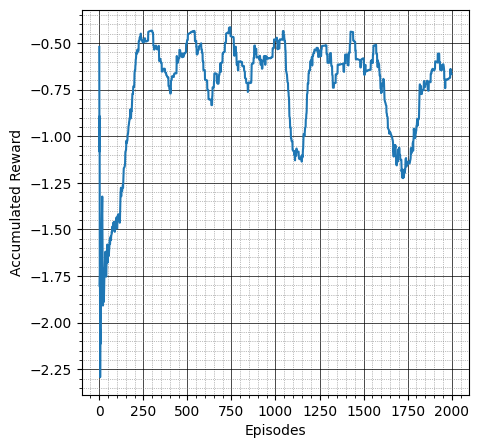

In [5]:
# instantiate grid world mdp
cw = CliffWorld(discount_factor=0.9, noise=0.0)

# instantiate Deep q function object for the gridworld problem
qfunction = DeepQFunction(cw, state_space=len(gw.initial_state), action_space=5, hidden_dim=32)

# instantiate Q learner
QL = QLearner(cw, qfunction, epsilon=0.1, alpha=1.0)

# training
episode_rewards = QL.train(episodes=2000)

# policy extraction
pi = qfunction.extract_policy(cw)

print("-----------------------")
for y in range(cw.height-1, -1, -1):
    for x in range(cw.width):
        if (x,y) in pi:
            print(f"{pi[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards, window_size=100)
